In [1]:
import numpy as np
import mne
from mne.datasets import sample

## Access raw data

In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

/home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


## Read data


In [3]:
raw = mne.io.read_raw_fif(raw_fname)
print(raw.info)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    

## get basic info of raw data

In [6]:
print(raw)
## n_channels x n_times : 376 x 41700 (277.7 sec)

<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.7 MB, data not loaded>


## 1. Read and plot a segment of raw data

(0, 7507)
(376, 7507)
(7507,)


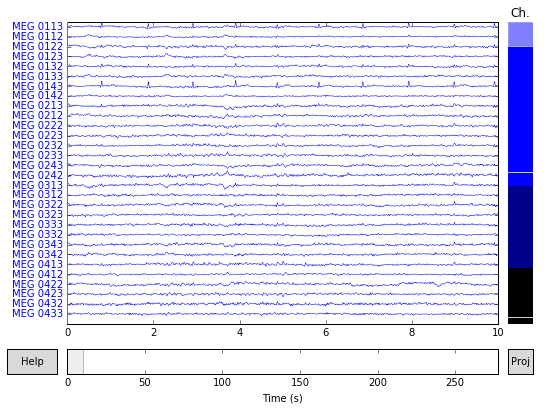

In [8]:
# Convert time to indices
start, stop = raw.time_as_index([0,50]) # 0s to 50s 
data, times = raw[:,start:stop]
print(start,stop)
print(data.shape)
print(times.shape)
raw.plot(n_channels=30);

## 2. Custom get time segment or channels segment by indices
- 注意这里的0:50的单位不是秒或者毫秒，而是indices

In [23]:
## time segment
time_seg_data, time = np.array(raw[:,0:50]) # time range:[0,50]
print("time segment:",time_seg_data.shape)

## channels segment
channel_seg_data, time = np.array(raw[0:20,:]) # channels range:[0,20]
print("channels segment:",channel_seg_data.shape)

('time segment:', (376, 50))
('channels segment:', (20, 41700))


## 3. 通过crop函数实现

In [5]:
raw = raw.crop(0, 50)  # in seconds
print('New time range from', raw.times.min(), 's to', raw.times.max(), 's')

('New time range from', 0.0, 's to', 50.00208201310587, 's')


In [8]:
print(raw)

<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 7509 (50.0 sec), ~3.7 MB, data not loaded>


## 4. 使用Raw类的get_data函数

In [11]:
selection = mne.read_selection('Left-temporal')
picks = mne.pick_types(raw.info,meg=True,selection=selection)
data = raw.get_data(picks=picks,start=0,stop=20)
print(data.shape)

(39, 20)
